# Accessing variable and transient objects in the truth catalog

**Notebook owner**: Yao-Yuan Mao [@yymao](https://github.com/LSSTDESC/DC2-analysis/issues/new?body=@yymao).

**Last Run:** 2018-10-17

**Learning Objectives:** Use GCR to load summary table and light curves of variable and transient objects in the truth catalogs

**Notes:** 
- Variable and transient objects are **not** available in truth catalog 1.1
- To run this notebook, follow the instructions to setup Jupyter-dev at NERSC: https://confluence.slac.stanford.edu/x/1_ubDQ

In [1]:
# import packages and methods that will be used in this notebook

import healpy as hp
import numpy as np
import GCRCatalogs
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Summary catalog

First, we'll load the **summary catalog** (`sc`). The summary catalog is just a simple table that contains the coordinates, types, and id of the objects. 

The `filters` and `native_filters` options work just like how they work for the static object catalog (see the `truth_gcr_intro` tutorial notebook). 

In [2]:
sc = GCRCatalogs.load_catalog('dc2_truth_run1.2_variable_summary')
sc.list_all_quantities(include_native=True)

['agn', 'sn', 'dec', 'uniqueId', 'galaxy_id', 'ra', 'sprinkled']

Let's now plot the locations of supernova and AGNs on the sky

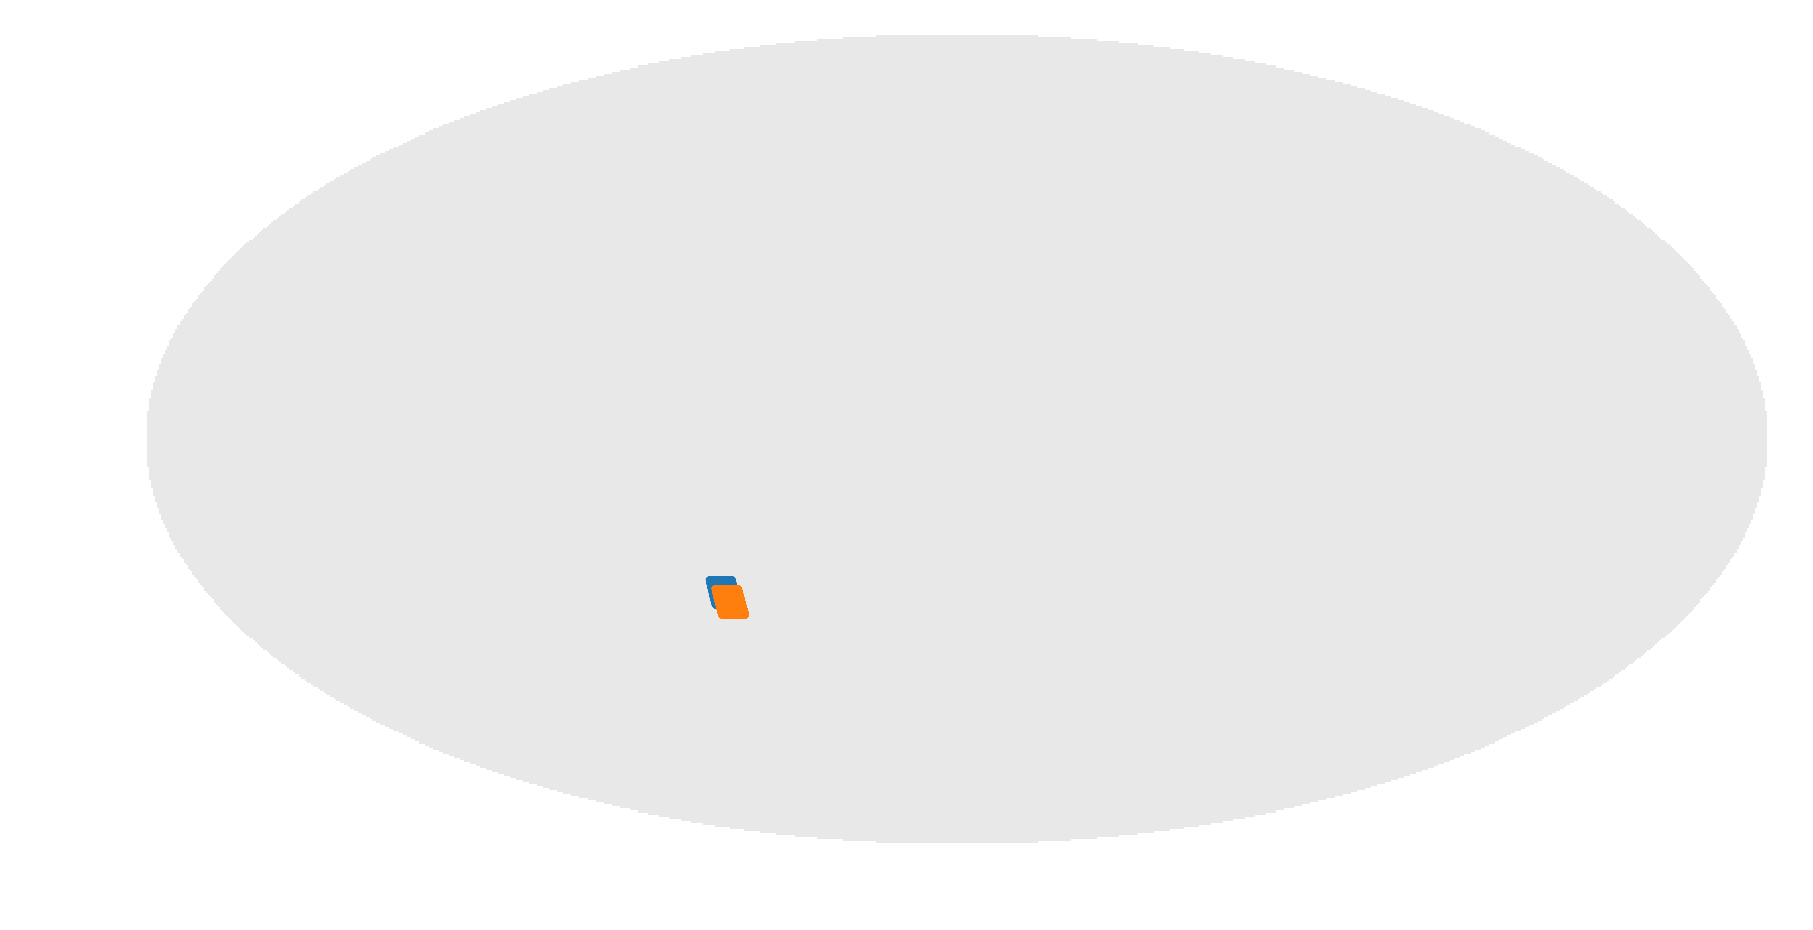

In [3]:
hp.mollview(np.ones(hp.nside2npix(2)), title='', cmap='Greys', min=0.9, max=1.5, cbar=None) # to get an empty sky map

data = sc.get_quantities(['ra', 'dec'], native_filters=['sn == 1'])
hp.projscatter(data['ra'], data['dec'], lonlat=True, s=1)

data = sc.get_quantities(['ra', 'dec'], native_filters=['agn == 1'])
hp.projscatter(data['ra'], data['dec'], lonlat=True, s=1)

## light curve catalog

The way to access light curve catalog (`lc`) is a bit different.

The data returned by the reader are the light curve tables, which have 5 columns: `uniqueId`, `obshistid`, `mjd`, `filter`, `mag`; and the `filters` option would work on any of these columns.

However, the `native_filters` option works differently. They would be imposed on the columns of the "summary catalog" we mentioned above, so that one can for example select SNs from a certain RA ranges. 

Another difference is that, when `return_iterator` is turned on, the reader will iterator over the objects (i.e., returns one light curve table per objects). 

It's probably easier to illustrate this by an example.

In [4]:
lc = GCRCatalogs.load_catalog('dc2_truth_run1.2_variable_lightcurve')
lc.list_all_quantities(include_native=True)

['mjd', 'mag', 'uniqueId', 'filter', 'obshistid']

Let's plot 3 supernova

Text(0,0.5,'$i$ [mag]')

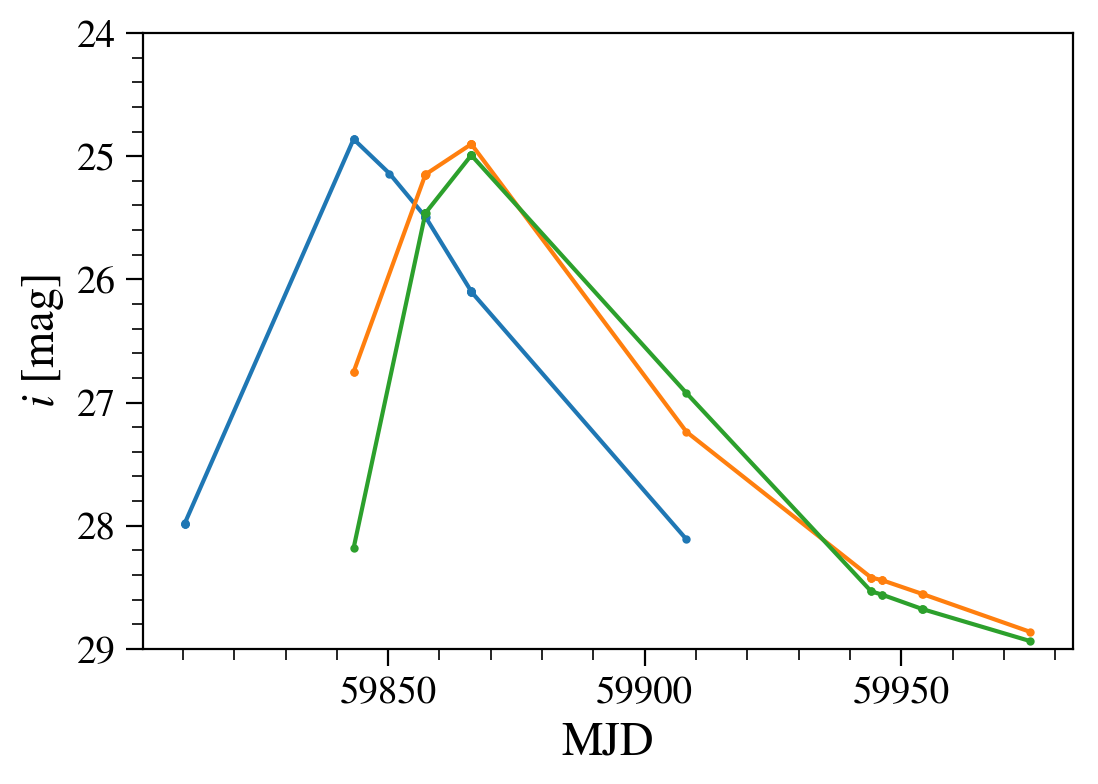

In [5]:
n_plotted = 0
for q in lc.get_quantities(['mjd', 'mag'], filters=['filter == 3'], native_filters=['sn == 1', 'ra > 40'], return_iterator=True):
    if len(q['mjd']) >= 20:
        plt.plot(q['mjd'], q['mag'], '.-')
        n_plotted += 1
    if n_plotted >= 3:
        break
plt.ylim(29, 24)
plt.xlabel('MJD')
plt.ylabel('$i$ [mag]')